# Stroke Prediction

## Goal : 
### Our objective is to predict whether a patient is likely to get stroke based on thefeatures from given data using  ML techniques.

## Data :

###  The dataset dowloaded is from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)



### Import Packages 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import roc_auc_score,mutual_info_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve

import xgboost as xgb
from xgboost import XGBClassifier

### Exploratory Data Analysis

In [2]:
# Data Loading 
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
#shape of the data
data.shape

(5110, 12)

In [4]:
# take a copy of the original data 
df = data.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Exclude the 'id' Column (we noticed that it's unnecessary column) 
df= df.loc[:,df.columns != 'id']

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.describe(exclude = 'object')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
# fill in the missing values in bmi with mean

In [12]:
df.bmi.fillna(np.mean(df.bmi), inplace = True)

In [13]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
categorical = ["gender", "work_type","Residence_type","smoking_status", "ever_married" ]
numerical = ["age","hypertension", "heart_disease", "avg_glucose_level", "bmi",
             "hypertension", "heart_disease"]

In [15]:
for c in (df[categorical]) : 
    print(df[c].value_counts(normalize=True),"\n")

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64 

Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64 

Urban    0.508023
Rural    0.491977
Name: Residence_type, dtype: float64 

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64 

Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64 



In [16]:
binary = ["hypertension", "heart_disease"]
for c in (df[binary]) : 
    print(df[c].value_counts(normalize=True),"\n")

0    0.902544
1    0.097456
Name: hypertension, dtype: float64 

0    0.945988
1    0.054012
Name: heart_disease, dtype: float64 



### Target feature : stroke

In [17]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#### Distrubution of stroke

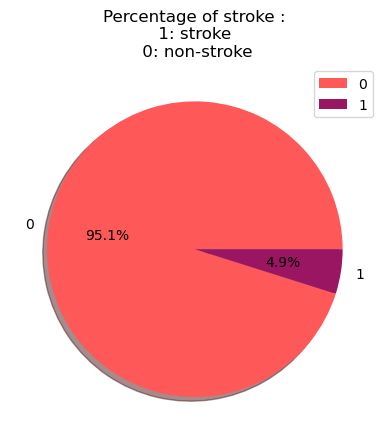

In [18]:
sns.color_palette("rocket_r", as_cmap=True)
labels = df["stroke"].value_counts().index
data =  df["stroke"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', colors =['#FF5858', '#9A1663'],
        shadow=True, startangle= 0)
plt.title("Percentage of stroke :\n 1: stroke \n 0: non-stroke");
plt.legend()

plt.show()

### Data Visualization

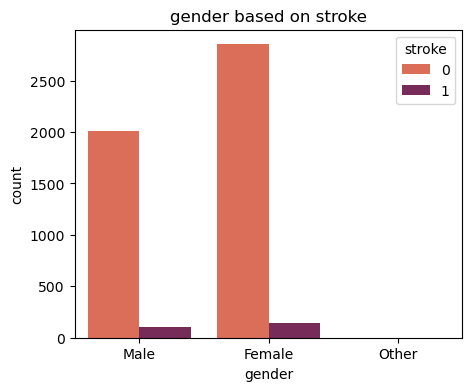

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(x=df.gender,data=df, palette='rocket_r', hue=df.stroke)
plt.title('gender based on stroke')
plt.show()

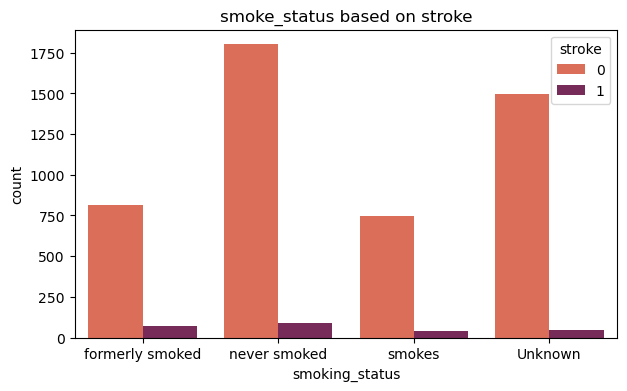

In [20]:
plt.figure(figsize=(7,4))
sns.countplot(x=df.smoking_status,data=df, palette='rocket_r', hue=df.stroke )
plt.title('smoke_status based on stroke')
plt.show()

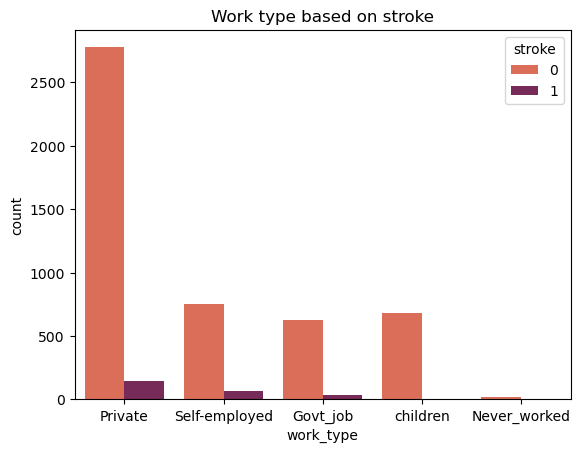

In [21]:
sns.countplot(x= df.work_type,data=df, palette='rocket_r', hue=df.stroke )
plt.title('Work type based on stroke')
plt.show()

### Feature Importance 

### Correlation : Correlation Matrix

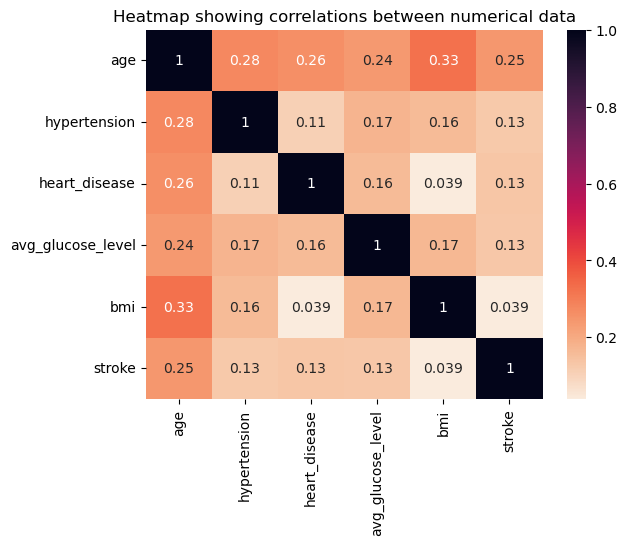

In [22]:
sns.heatmap(df.corr(), annot = True, cmap = 'rocket_r')
plt.title('Heatmap showing correlations between numerical data')
plt.show()

#### age and bmi have the biggest correlation

###  Stroke Rate and Ratio 

In [23]:
global_stroke = df.stroke.mean()

for c in categorical:
    print(c)
    df_group = df.groupby(c).stroke.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_stroke
    df_group['risk'] = df_group['mean'] / global_stroke
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
Female,0.047094,2994,-0.001634,0.966471
Male,0.051064,2115,0.002336,1.047936
Other,0.000000,1,-0.048728,0.000000




work_type


,mean,count,diff,risk
work_type,,,,
Govt_job,0.050228,657,0.001500,1.030790
Never_worked,0.000000,22,-0.048728,0.000000
Private,0.050940,2925,0.002212,1.045399
Self-employed,0.079365,819,0.030637,1.628737
children,0.002911,687,-0.045817,0.059744




Residence_type


,mean,count,diff,risk
Residence_type,,,,
Rural,0.045346,2514,-0.003382,0.930596
Urban,0.052003,2596,0.003275,1.067212




smoking_status


,mean,count,diff,risk
smoking_status,,,,
Unknown,0.030440,1544,-0.018288,0.624701
formerly smoked,0.079096,885,0.030368,1.623216
never smoked,0.047569,1892,-0.001159,0.976209
smokes,0.053232,789,0.004504,1.092431




ever_married


,mean,count,diff,risk
ever_married,,,,
No,0.016505,1757,-0.032223,0.338725
Yes,0.065613,3353,0.016885,1.346513


### Mutuel Information 

In [24]:
def mutual_info_stroke_score(series):
    return mutual_info_score(series, df.stroke)

In [25]:
mutuel_info = df[categorical].apply(mutual_info_stroke_score)
mutuel_info.sort_values(ascending=True)

gender            0.000051
Residence_type    0.000120
smoking_status    0.002750
work_type         0.006825
ever_married      0.006950
dtype: float64

 ### Setting up the validation framework


In [26]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [27]:
len(df_train), len(df_val), len(df_test)

(3066, 1022, 1022)

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.stroke.values
y_val = df_val.stroke.values
y_test = df_test.stroke.values


In [29]:
del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

### One-hot encoding

In [30]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [31]:
dv.get_feature_names()

['Residence_type=Rural',
 'Residence_type=Urban',
 'age',
 'avg_glucose_level',
 'bmi',
 'ever_married=No',
 'ever_married=Yes',
 'gender=Female',
 'gender=Male',
 'heart_disease',
 'hypertension',
 'smoking_status=Unknown',
 'smoking_status=formerly smoked',
 'smoking_status=never smoked',
 'smoking_status=smokes',
 'work_type=Govt_job',
 'work_type=Never_worked',
 'work_type=Private',
 'work_type=Self-employed',
 'work_type=children']

## Model training

### Logistic regression 

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
lr.coef_

array([[-1.13971908, -1.07918787,  0.06692418,  0.00364053, -0.00939536,
        -0.87845799, -1.34044895, -1.05571178, -1.16319516,  0.4973187 ,
         0.24780095, -0.42379543, -0.46913755, -0.70827355, -0.61770042,
        -0.36883756, -0.04479172, -0.40338154, -0.72901893, -0.67287719]])

In [34]:
def evaluation_model(model):
    
    # Training Dataset 
    y_pred = model.predict_proba(X_train)[:, 1]
    acc_train = roc_auc_score(y_train, y_pred)* 100
    print('Training Accuracy: ',acc_train)

    # Validation Dataset
    y_pred = model.predict_proba(X_val)[:, 1]
    acc_val = roc_auc_score(y_val, y_pred)* 100
    print('Validation Accuracy: ',acc_val )
    print('\n')
    cf = confusion_matrix(y_test, model.predict(X_val))
    print('Confusion Matrix: \n', cf )
    return {'acc_train' :acc_train,
            'acc_val' : acc_val }

In [35]:
lr_score = evaluation_model(lr)

Training Accuracy:  83.91401481249699
Validation Accuracy:  83.90274949083502


Confusion Matrix: 
 [[962   0]
 [ 60   0]]


As the accuracy of both the training and the validation processes are so close, we don't have overfitting.

###  Logistic Regression Hyperparameter Tuning

In [36]:
c_space = np.logspace(-5, 8, 15)
 
params = {'C': c_space, 
          'max_iter': [20, 50, 100, 200, 500, 1000]}
 
# Instantiating the GridSearchCV object
grid= GridSearchCV(lr ,params,  cv = 10,scoring='roc_auc', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
{'C': 0.05179474679231213, 'max_iter': 200}
LogisticRegression(C=0.05179474679231213, max_iter=200)


In [37]:
lr = LogisticRegression(C=0.05179474679231213, max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(C=0.05179474679231213, max_iter=200)

In [38]:
tuned_lr_score = evaluation_model(lr)

Training Accuracy:  83.91792615839111
Validation Accuracy:  84.38136456211814


Confusion Matrix: 
 [[962   0]
 [ 60   0]]


### Desicion Tree

In [39]:
dt = DecisionTreeClassifier()


In [40]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- age <= 67.50
|   |--- age <= 56.50
|   |   |--- age <= 48.50
|   |   |   |--- bmi <= 56.30
|   |   |   |   |--- age <= 37.50
|   |   |   |   |   |--- avg_glucose_level <= 57.93
|   |   |   |   |   |   |--- avg_glucose_level <= 57.88
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- avg_glucose_level >  57.88
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- avg_glucose_level >  57.93
|   |   |   |   |   |   |--- age <= 1.36
|   |   |   |   |   |   |   |--- bmi <= 26.70
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- bmi >  26.70
|   |   |   |   |   |   |   |   |--- gender=Female <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- gender=Female >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- age >  1.36
|   |   |   |   |   |   |   |--- smoking_status=smokes <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |  

In [42]:
dt_score = evaluation_model(dt)

Training Accuracy:  100.0
Validation Accuracy:  56.61150712830957


Confusion Matrix: 
 [[917  45]
 [ 56   4]]


### Decision Tree Hyperparameter Tuning

In [43]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100]
}
grid = GridSearchCV(dt, params, cv=10, scoring='roc_auc', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
{'max_depth': 3, 'min_samples_leaf': 10}
DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)


In [44]:
dt = DecisionTreeClassifier(max_depth = 3,min_samples_leaf = 10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [45]:
tuned_dt_score = evaluation_model(dt)

Training Accuracy:  83.44361794893624
Validation Accuracy:  80.42260692464357


Confusion Matrix: 
 [[962   0]
 [ 60   0]]


### Random Forest 

In [46]:
rf =RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
rf_score = evaluation_model(rf)

Training Accuracy:  100.0
Validation Accuracy:  79.15605906313645


Confusion Matrix: 
 [[960   2]
 [ 60   0]]


### Random Forest Hyperparameter Tuning

In [48]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100]
}
grid = GridSearchCV(rf, params, cv=10, scoring='roc_auc', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
{'max_depth': 3, 'min_samples_leaf': 10}
RandomForestClassifier(max_depth=3, min_samples_leaf=10)


In [49]:
rf =RandomForestClassifier(max_depth = 3,min_samples_leaf = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10)

In [50]:
tuned_rf_score = evaluation_model(rf)

Training Accuracy:  85.67412046485195
Validation Accuracy:  82.89714867617108


Confusion Matrix: 
 [[962   0]
 [ 60   0]]


### XG Boost

In [51]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [52]:
xgb_score = evaluation_model(xgb)

Training Accuracy:  100.0
Validation Accuracy:  80.5397148676171


Confusion Matrix: 
 [[950  12]
 [ 60   0]]


## XG Boost Hyperparameter Tuning

In [53]:
xgb = XGBClassifier()
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}


cv=RandomizedSearchCV(estimator=xgb,param_distributions=params,
                             cv=5,n_iter=5,scoring='roc_auc',n_jobs=1,verbose=3,return_train_score=True,random_state=121)
cv.fit(X_train,y_train)
print(cv.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=3, min_child_weight=5;, score=(train=0.967, test=0.783) total time=   0.8s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=3, min_child_weight=5;, score=(train=0.956, test=0.901) total time=   0.9s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=3, min_child_weight=5;, score=(train=0.963, test=0.790) total time=   0.8s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=3, min_child_weight=5;, score=(train=0.957, test=0.825) total time=   1.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=3, min_child_weight=5;, score=(train=0.965, test=0.754) total time=   0.9s
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=3;, score=(train=0.991, test=0.793) total time=   1.1s
[CV 2/5] END colsample_bytree=0.3

In [54]:
xbg =  XGBClassifier(min_child_weight= 7, max_depth = 15, learning_rate= 0.15, gamma = 0.3, colsample_bytree = 0.4)

In [55]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [56]:
tuned_xgb_score = evaluation_model(xgb)

Training Accuracy:  100.0
Validation Accuracy:  80.5397148676171


Confusion Matrix: 
 [[950  12]
 [ 60   0]]


### Evaluation Models

In [57]:
df_result = pd.DataFrame(data=[["Logistic Regression", lr_score['acc_train'],lr_score['acc_val'] ],
                              ["Decision Tree", dt_score['acc_train'],dt_score['acc_val']],
                              ["Random Forest", rf_score['acc_train'],rf_score['acc_val']],
                              ["XGBoost",xgb_score['acc_train'],xgb_score['acc_val']]
                              ],
                          columns=['Model', 'Training Accuracy %', 'Validation Accuracy %'])
df_result

,Model,Training Accuracy %,Validation Accuracy %
0,Logistic Regression,83.914015,83.902749
1,Decision Tree,100.000000,56.611507
2,Random Forest,100.000000,79.156059
3,XGBoost,100.000000,80.539715


### Tuned Evaluation Models 

In [58]:
df_tuned_result = pd.DataFrame(data=[["Tuned Logistic Regression", tuned_lr_score['acc_train'],tuned_lr_score['acc_val'] ],
                              ["Tuned Decision Tree", tuned_dt_score['acc_train'],tuned_dt_score['acc_val']],
                              ["Tuned Random Forest", tuned_rf_score['acc_train'],tuned_rf_score['acc_val']],
                              ["Tuned XGBoost", tuned_xgb_score['acc_train'],tuned_xgb_score['acc_val']]
                              ],
                          columns=['Model', 'Training Accuracy %', 'Validation Accuracy %'])
df_tuned_result

,Model,Training Accuracy %,Validation Accuracy %
0,Tuned Logistic Regression,83.917926,84.381365
1,Tuned Decision Tree,83.443618,80.422607
2,Tuned Random Forest,85.674120,82.897149
3,Tuned XGBoost,100.000000,80.539715


### Based on this info, it seems that Logistic Regression model (Tuned) is the best one

### Training the final model 

In [59]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.stroke.values
del df_full_train['stroke']

dict_final = df_full_train.to_dict(orient='records')

dv_final = DictVectorizer(sparse=False)

X_full_train = dv_final.fit_transform(dict_final)

In [60]:
final_model = LogisticRegression(C=0.05179474679231213, max_iter=200)
final_model.fit(X_full_train, y_full_train)

LogisticRegression(C=0.05179474679231213, max_iter=200)

In [61]:
evaluation_model(final_model)

Training Accuracy:  83.90711243738971
Validation Accuracy:  84.84215885947047


Confusion Matrix: 
 [[962   0]
 [ 60   0]]


{'acc_train': 83.90711243738971, 'acc_val': 84.84215885947047}

## Final conclusion : Logistic Regression model is the best model 